# Benzie Conservation District - Volunteer Data Science Project - Plots for Presentation
## Mees Franssen
Making some basic figures to supplement a presentation


In [ ]:
# import required packages 
import os
import geopandas as gpd
from matplotlib_map_utils.core.north_arrow import north_arrow
from matplotlib_map_utils.core.scale_bar import scale_bar
from shapely.ops import unary_union

In [116]:
# import the data
counties_filepath = '/Data/County.geojson'
counties = gpd.read_file(os.getcwd() + counties_filepath)

inland_lakes_rivers_filepath = '/Data/inland_lakes_and_rivers.geojson'
inland_lakes_rivers = gpd.read_file(os.getcwd() + inland_lakes_rivers_filepath)

relevant_counties = ['Benzie','Grand Traverse','Manistee', 'Leelanau'] # Benzie, Grand Traverse, Manistee, and Leelanau Counties
counties = counties.loc[counties['Name'].isin(relevant_counties)]

inland_lakes_rivers = inland_lakes_rivers.to_crs(counties.crs)
county_mask = unary_union(counties['geometry'])

inland_lakes_rivers['geometry'] = inland_lakes_rivers.geometry.intersection(county_mask)

counties

,OBJECTID,FIPSCode,Name,FeatureID,MapLayout,FIPSNum,Label,Type,CntyCode,Peninsula,MGFVersion,Shape__Area,Shape__Length,geometry
9,351,019,Benzie,43066a04-8738-435b-ad6d-8c169d65fd36,landscape,19,Benzie County,County,19,Lower,V25,8.997025e+08,122485.022828,"POLYGON ((-85.81513 44.77453, -85.81512 44.771..."
25,367,055,Grand Traverse,99637d77-669d-4e9e-be1d-784fe846f6b6,portrait,55,Grand Traverse County,County,55,Lower,V25,1.268839e+09,225023.269062,"MULTIPOLYGON (((-85.57314 44.86307, -85.57334 ..."
44,386,089,Leelanau,6e221d91-ba05-4e02-baf9-3ff5593c1128,portrait,89,Leelanau County,County,89,Lower,V25,9.726082e+08,285804.707148,"MULTIPOLYGON (((-86.11557 45.04735, -86.11481 ..."
50,392,101,Manistee,f8e62741-8dfb-4b1d-a855-0f61385b14d6,landscape,101,Manistee County,County,101,Lower,V25,1.443330e+09,158296.673227,"POLYGON ((-85.81781 44.51298, -85.81781 44.512..."


/Users/mfranssen/Documents/VSCode/BCD_proj/bcd_venv/lib/python3.13/site-packages/matplotlib_map_utils/core/scale_bar.py:676: UserWarning: Provided CRS EPSG:4326 uses degrees. An attempt will be made at conversion, but there will be accuracy issues: it is recommended that you use a projected CRS instead.
  warnings.warn(f"Provided CRS {bar['projection']} uses degrees. An attempt will be made at conversion, but there will be accuracy issues: it is recommended that you use a projected CRS instead.")


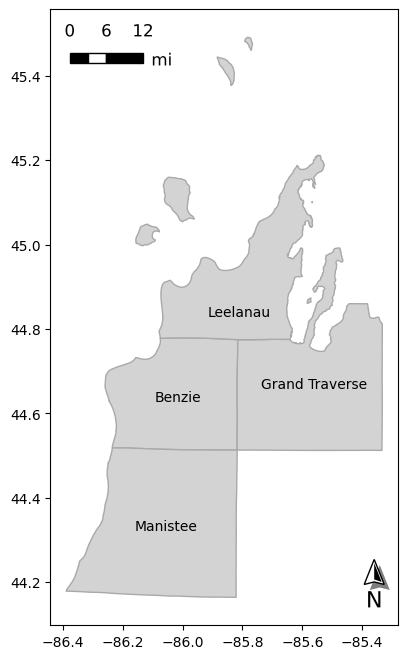

In [ ]:
ax = counties.plot(figsize=(8,8), color='lightgrey', edgecolor='darkgrey')

# the following can be done in a simple loop, but I want to customize the location of each name 

# Benzie County
x,y = list(counties['geometry'])[0].centroid.x, list(counties['geometry'])[0].centroid.y
ax.text(x,y, list(counties['Name'])[0], ha='center', va='center', fontsize=10)

# Grand Traverse County
x,y = list(counties['geometry'])[1].centroid.x, list(counties['geometry'])[1].centroid.y
ax.text(x,y, list(counties['Name'])[1], ha='center', va='center', fontsize=10)

# Leelanau County
x,y = list(counties['geometry'])[2].centroid.x, list(counties['geometry'])[2].centroid.y - 0.1 
ax.text(x,y, list(counties['Name'])[2], ha='center', va='center', fontsize=10)

# Manistee County
x,y = list(counties['geometry'])[3].centroid.x, list(counties['geometry'])[3].centroid.y
ax.text(x,y, list(counties['Name'])[3], ha='center', va='center', fontsize=10)

north_arrow(ax, location="lower right", rotation={"crs": counties.crs, "reference": "center"}, scale=0.25)
scale_bar(ax, location="upper left", style="boxes", 
          bar={"projection": counties.crs, 
               'unit':'mi', 
               'max':12,
               'major_div':2})

Text(-85.99680773258282, 44.36300740769344, 'Manistee')

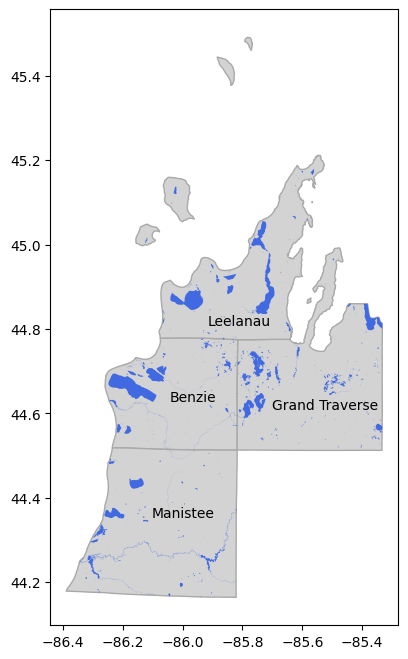

In [ ]:
ax = counties.plot(figsize=(8,8), color='lightgrey', edgecolor='darkgrey')
inland_lakes_rivers.plot(color='royalblue', ax=ax)

# Benzie County
x,y = list(counties['geometry'])[0].centroid.x + 0.05, list(counties['geometry'])[0].centroid.y
ax.text(x,y, list(counties['Name'])[0], ha='center', va='center', fontsize=10)

# Grand Traverse County
x,y = list(counties['geometry'])[1].centroid.x + 0.035, list(counties['geometry'])[1].centroid.y - 0.05
ax.text(x,y, list(counties['Name'])[1], ha='center', va='center', fontsize=10)

# Leelanau County
x,y = list(counties['geometry'])[2].centroid.x, list(counties['geometry'])[2].centroid.y - 0.12
ax.text(x,y, list(counties['Name'])[2], ha='center', va='center', fontsize=10)

# Manistee County
x,y = list(counties['geometry'])[3].centroid.x + 0.06, list(counties['geometry'])[3].centroid.y + 0.03
ax.text(x,y, list(counties['Name'])[3], ha='center', va='center', fontsize=10)
